<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/PART_3_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The code is from this tutorial https://towardsdatascience.com/text-classification-in-python-dd95d264c802

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
# We will use 2 techniques for dimensionality reduction (to plot the observations in 2 dimensions)

# PCA
# t-SNE

# First we get features and lables

# Dataframe
path_df = "/content/drive/MyDrive/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "/content/drive/MyDrive/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/content/drive/MyDrive/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/content/drive/MyDrive/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/content/drive/MyDrive/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [4]:
# Shapes of train and test sets

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(1500, 300)
(500, 300)
(1500,)
(500,)


In [6]:
# We concatenate them

features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)
print(features.shape)
print(labels.shape)

(2000, 300)
(2000,)


In [17]:
# function that comprises the whole visualization process

def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'Computer/Tech',
        "1": 'Engineering/Architecture',
        "2": 'Business/Consulting'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "royalblue", "greenyellow"],
                    alpha=.7).set_title(title);

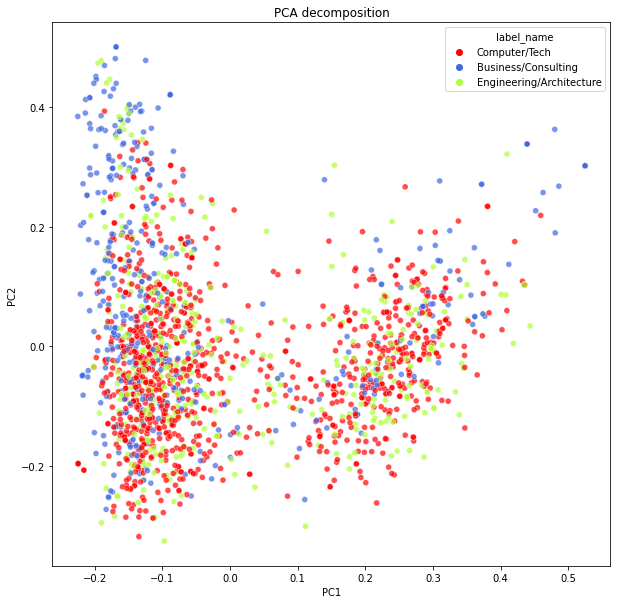

In [18]:
# Dimensionality reduction with PCA

# Plot PCA model result

plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

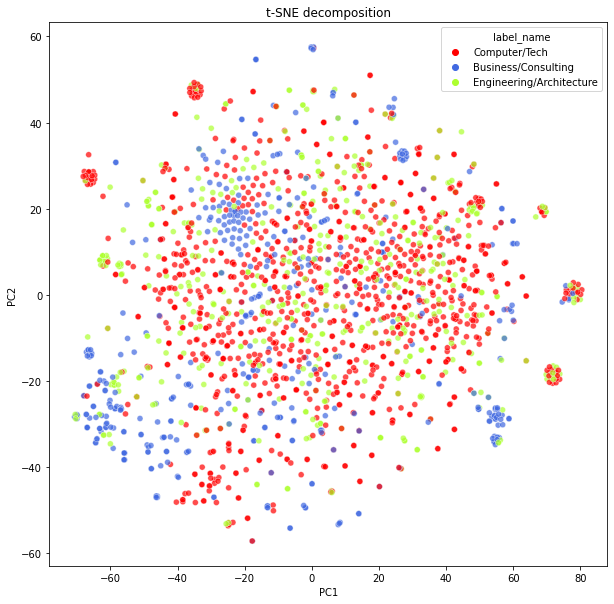

In [19]:
# Dimensionality Reduction with t-SNE

# plot the t-SNE model result

plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

In [ ]:
# None of the decomposition methods work well for this data.